In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from utils import BayesianTransformer, VisualizeBT_coin_toss, train_models_wrapper

import os

# sometimes need to reset nviidai_uvm from command line
#> sudo rmmod nvidia_uvm
#> sudo modprobe nvidia_uvm


/media/cat/4TBSSD/anaconda3/envs/btrans2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
#########################################################
########### LOAD A SAVED TRANSFORMER MODEL ##############
#########################################################

'''
    This notebook loads a saved transformer model and visualizes the predictions

    The model is saved as a .btrans file

    The model is loaded using the BayesianTransformer class

    The model is visualized using the VisualizeBT_coin_toss class

'''


# but for now all models were trained with 100 episdoes per
n_episodes_batch = 100  #TODO: Decrease this to 16 or 32, or some multiple of 2

# how many episodes to test on
n_test_trials = 100

# number of times we toss the coin or roll the dice
n_trials = len_episode = 10 

# how often we predict during training; not used for this base model - but other models have this enabled
predict_during_training_interval = 100
predict_during_training = True                  # this saves model predictions every x timesteps

# # of layers of the transformer
n_layers_array = [1]  # [1,10,100]

####################################
n_training_epochs_array = [10000]    #  [10,100,1000, 10000]

# OPTION #1
coin_toss_params_list = [
               [1,1],
               #[5,1.2],
               #[0.1,0.1],
               #[15,50],
             ]

##############################################
game_type = "coin_toss"
params_list = dice_roll_params_list if game_type=="dice_roll" else coin_toss_params_list

####################################
#
coin_toss_params = dice_roll_params = coin_toss_params_list[0]
n_layers = n_layers_array[0]
n_training_epochs = n_training_epochs_array[0]
params = params_list[0]
#
bt = BayesianTransformer(n_layers,
                          n_training_epochs,
                          n_episodes_batch,
                          n_trials,
                          game_type,
                          coin_toss_params,
                          dice_roll_params)        

#
bt.root_dir = '/home/cat/code/CHERI_Aug_2023/'

#
bt.n_test_trials = n_test_trials

# if using multi distributions
bt.params_list = params_list
bt.use_multi_distributions = False

#
bt.predict_during_training = predict_during_training
bt.predict_during_training_interval = predict_during_training_interval

# make the model filename
bt.make_model_name()

print ("Loading model: ", bt.fname_model)
bt.load_model()

... coin toss params:  [1, 1]
... params:  [1, 1]
searching for model:  /home/cat/code/CHERI_Aug_2023/model_nlayers_1_ntraining_10000_ncoin_tosses_10_coin_toss_[1, 1].btrans
Loading model:  /home/cat/code/CHERI_Aug_2023/model_nlayers_1_ntraining_10000_a0_1_b0_1.btrans
... resetting cuda device ...
... cuda available:  True
Moving model to device:  cuda
Loading:  /home/cat/code/CHERI_Aug_2023/model_nlayers_1_ntraining_10000_a0_1_b0_1.btrans
Moving model to device:  cpu


test data:  tensor([2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1], device='cuda:0')
transformer prediction:  [0.47033462 0.30685693 0.49329227 0.39258367 0.48984513 0.5689247
 0.62043446 0.5544575  0.47408918 0.5488002  0.47592548]
a:  1  b:  2  y:  0.3333333333333333
a:  2  b:  2  y:  0.5
a:  2  b:  3  y:  0.4
a:  3  b:  3  y:  0.5
a:  4  b:  3  y:  0.5714285714285714
a:  5  b:  3  y:  0.625
a:  5  b:  4  y:  0.5555555555555556
a:  5  b:  5  y:  0.5
a:  6  b:  5  y:  0.5454545454545454
a:  6  b:  6  y:  0.5
bayesian optimal:  [0.5        0.33333333 0.5        0.4        0.5        0.57142857
 0.625      0.55555556 0.5        0.54545455 0.5       ]


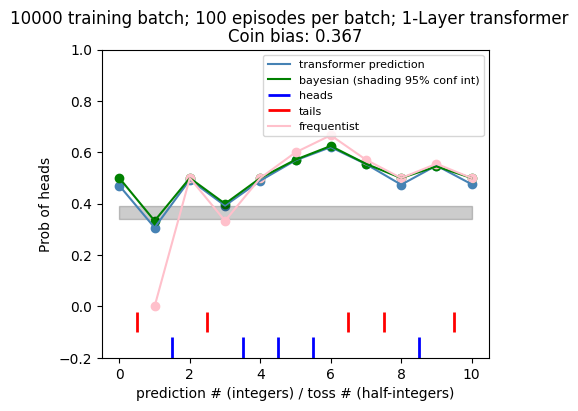

In [9]:
#####################################################
############## VISUALIZE RESULTS ####################
#####################################################

# run this notebook several times to visualize the transformer prediction against bayesian optimal and frequentist predictions

#
vis = VisualizeBT_coin_toss(bt)
vis.save_svg=False
vis.show_kl_entropy = False
vis.use_multi_distributions = False
vis.show_frequentist = True
vis.show_examples(1)

#


In [ ]:
##################
##################
##################

#
vis.plot_L1()



In [10]:
# Generate a sample from the Dirichlet distribution
alpha = [1, 1, 1]

sample = np.random.dirichlet(alpha)

print("Sample from Dirichlet distribution:", sample)

Sample from Dirichlet distribution: [0.4771895  0.33177353 0.19103697]


In [2]:
import torch
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'